In [1]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import statistics

## Normality Test

[scipy.stats.normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html): This function tests the null hypothesis that **a sample comes from a normal distribution**.

In [ ]:
rng = np.random.default_rng()
pts = 1000
a = rng.normal(0, 1, size=pts)
b = rng.normal(2, 1, size=pts)
x = np.concatenate((a, b))

In [ ]:
k2, p = stats.normaltest(a)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.507195
The null hypothesis cannot be rejected


In [ ]:
k2, p = stats.normaltest(x)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 5.13482e-06
The null hypothesis can be rejected


## Chi-squared Distribution

Reading:
* https://en.wikipedia.org/wiki/Chi-squared_distribution
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html

The probability density function for chi2 is:

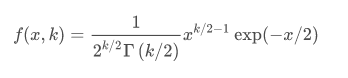

for $x>0$ and $k>0$ (degrees of freedom, denoted df in the implementation).

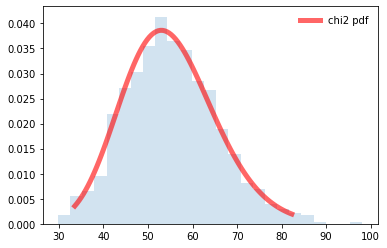

In [3]:
fig, ax = plt.subplots(1, 1)
df = 55
mean, var, skew, kurt = stats.chi2.stats(df, moments='mvsk')
x = np.linspace(stats.chi2.ppf(0.01, df),
                stats.chi2.ppf(0.99, df), 100)
ax.plot(x, stats.chi2.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

vals = stats.chi2.ppf([0.001, 0.5, 0.999], df)
r = stats.chi2.rvs(df, size=1000)
ax.hist(r, bins=25, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

## F-Distribution

Reading:
* https://en.wikipedia.org/wiki/F-distribution
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html

If $X_1$ and $X_2$ are independent chi-squared rv’s with $v_1$ and $v_2$ df, respectively, then the rv
\begin{equation}
F = \frac{X_1/v_1}{X_2/v_2}
\end{equation}

The probability density function of f is (for x > 0):

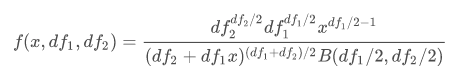

where $B$ is [beta function](https://en.wikipedia.org/wiki/Beta_function).

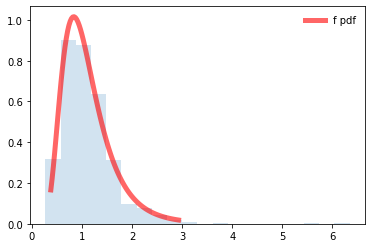

In [ ]:
fig, ax = plt.subplots(1, 1)
dfn, dfd = 29, 18
mean, var, skew, kurt = stats.f.stats(dfn, dfd, moments='mvsk')
x = np.linspace(stats.f.ppf(0.01, dfn, dfd),
                stats.f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, stats.f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

r = stats.f.rvs(dfn, dfd, size=1000)
ax.hist(r, bins=20, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

* F distribution is an asymmetric distribution usually used for ANOVA. 
*  One-way ANOVA: $F = \frac{MS_{B}}{MS_{W}}$
* It has a minimum value of zero, and there is no maximum value. 
* Each curve depends on the degrees of freedom in the numerator (dfn) and the denominator (dfd). 

## One-factor ANOVA / One-way ANOVA

Reading:
* https://en.wikipedia.org/wiki/One-way_analysis_of_variance
* https://www.reneshbedre.com/blog/anova.html

* ANOVA: ANalysis Of VAriance 
* Factor is an independent variable.

ANOVA HypothesesPermalink
* **Null hypothesis**: Groups means are equal (no variation in means of groups)
H0: $\mu_1 = \mu_2 = ... = \mu_p$
* **Alternative hypothesis**: At least, one group mean is different from other groups
H1: All $\mu$s are not equal

In [ ]:
data =[
[25,	45,	30,	54],
[30,	55,	29,	60],
[28,	29,	33,	51],
[36,	56,	37,	62],
[29,	40,	27,	73]]

df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D'])

df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [ ]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


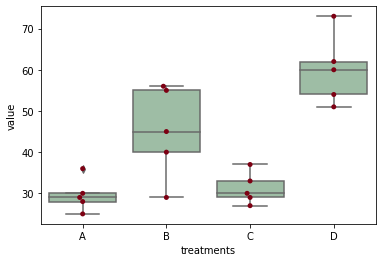

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [ ]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


* The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.
* F value is inversely related to p value and higher F value (greater than F critical value) indicates a significant p value.

## From Scratch

Reading:
* https://towardsdatascience.com/1-way-anova-from-scratch-dissecting-the-anova-table-with-a-worked-example-170f4f2e58ad

In [ ]:
# Time measured to execute a program on three different systems
A = [0.0972, 0.0971, 0.0969, 0.1954, 0.0974]
B = [0.1382, 0.1432, 0.1382, 0.1730, 0.1383]
C = [0.7966, 0.5300, 0.5152, 0.6675, 0.5298]

In [ ]:
all_times = A + B + C
system_names = (['A'] * len(A)) +  (['B'] * len(B)) +  (['C'] * len(C))
data = pd.DataFrame({'system': system_names, 'time': all_times})
data

,system,time
0,A,0.0972
1,A,0.0971
2,A,0.0969
3,A,0.1954
4,A,0.0974
5,B,0.1382
6,B,0.1432
7,B,0.1382
8,B,0.1730
9,B,0.1383


In [ ]:
data.groupby('system').mean()

,time
system,
A,0.11680
B,0.14618
C,0.60782


In [ ]:
overall_mean = data['time'].mean()
overall_mean

0.29026666666666673

In [ ]:
# compute Sum of Squares Total
data['overall_mean'] = overall_mean
ss_total = sum((data['time'] - data['overall_mean'])**2)
ss_total

0.8270202133333334

In [ ]:
# compute group means
group_means = data.groupby('system').mean()
group_means = group_means.rename(columns = {'time': 'group_mean'})
group_means

,group_mean,overall_mean
system,,
A,0.11680,0.290267
B,0.14618,0.290267
C,0.60782,0.290267


In [ ]:
# add group means and overall mean to the original data frame
data = data.drop('overall_mean', axis=1)
data = data.merge(group_means, left_on='system', right_index=True, copy=False)
data

,system,time,group_mean,overall_mean
0,A,0.0972,0.11680,0.290267
1,A,0.0971,0.11680,0.290267
2,A,0.0969,0.11680,0.290267
3,A,0.1954,0.11680,0.290267
4,A,0.0974,0.11680,0.290267
5,B,0.1382,0.14618,0.290267
6,B,0.1432,0.14618,0.290267
7,B,0.1382,0.14618,0.290267
8,B,0.1730,0.14618,0.290267
9,B,0.1383,0.14618,0.290267


In [ ]:
# compute Sum of Squares Residual
# Within-group Variability / unexplained variance
# Denoted as SSE in my lecture slide
ss_residual = sum((data['time'] - data['group_mean'])**2)
ss_residual

0.06856135599999998

In [ ]:
# compute Sum of Squares Model
# Explained Variance or Between-group Variability 
# Denoted as SSA in my lecture slides
ss_explained = sum((data['overall_mean'] - data['group_mean'])**2)
ss_explained

0.7584588573333333

In [ ]:
n_groups = len(set(data['system']))
n_obs = data.shape[0]
df_residual = n_obs - n_groups
df_residual

12

In [ ]:
# compute Mean Square Residual
# Mean within-group variability / unexplained variance
ms_residual = ss_residual / df_residual
ms_residual

0.005713446333333331

In [ ]:
df_explained = n_groups - 1
df_explained

2

In [ ]:
# compute Mean Square Explained
ms_explained = ss_explained / df_explained
ms_explained

0.37922942866666665

In [ ]:
# compute F-Value
f = ms_explained / ms_residual
f

66.37489993634317

In [ ]:
stats.f.ppf(0.95, df_explained, df_residual)

3.8852938346523933

In [ ]:
# compute p-value
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

NameError: ignored

We also use f_oneway function described below to obtain the same results.

In [ ]:
F, p = stats.f_oneway(A, B, C)
print(F, p)

## Using scipy.stats.f_oneway

**scipy.stats.f_oneway**: The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.
* The samples are independent.
* Each sample is from a normally distributed population.
* The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

If these assumptions are not true for a given set of data, it may still be possible to use the Kruskal-Wallis H-test ([scipy.stats.kruskal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal)) or the Alexander-Govern test ([scipy.stats.alexandergovern](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.alexandergovern.html#scipy.stats.alexandergovern)) although with some loss of power.

In [ ]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735,
             0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

print(len(tillamook), len(newport), len(petersburg), len(magadan), len(tvarminne))
print(np.mean(tillamook), np.mean(newport), np.mean(petersburg), np.mean(magadan), np.mean(tvarminne))
print(statistics.stdev(tillamook), statistics.stdev(newport), statistics.stdev(petersburg), statistics.stdev(magadan), statistics.stdev(tvarminne))

F, p = stats.f_oneway(tillamook, newport, petersburg, magadan, tvarminne)
print(F, p)